In [97]:
import django
import os
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'config.settings.local')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

from ect_66_analysis.analysis.models import *

In [98]:
import pandas as pd
from collections import defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.font_manager

matplotlib.font_manager.fontManager.addfont('/usr/share/fonts/truetype/tlwg/Sawasdee.ttf')

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': ['Sawasdee'],
    }
)

# EXCLUDE_PARTY_NO = []
EXCLUDE_PARTY_NO = [7, 11, 14, 18, 22, 25, 26, 29, 31, 32, 37]

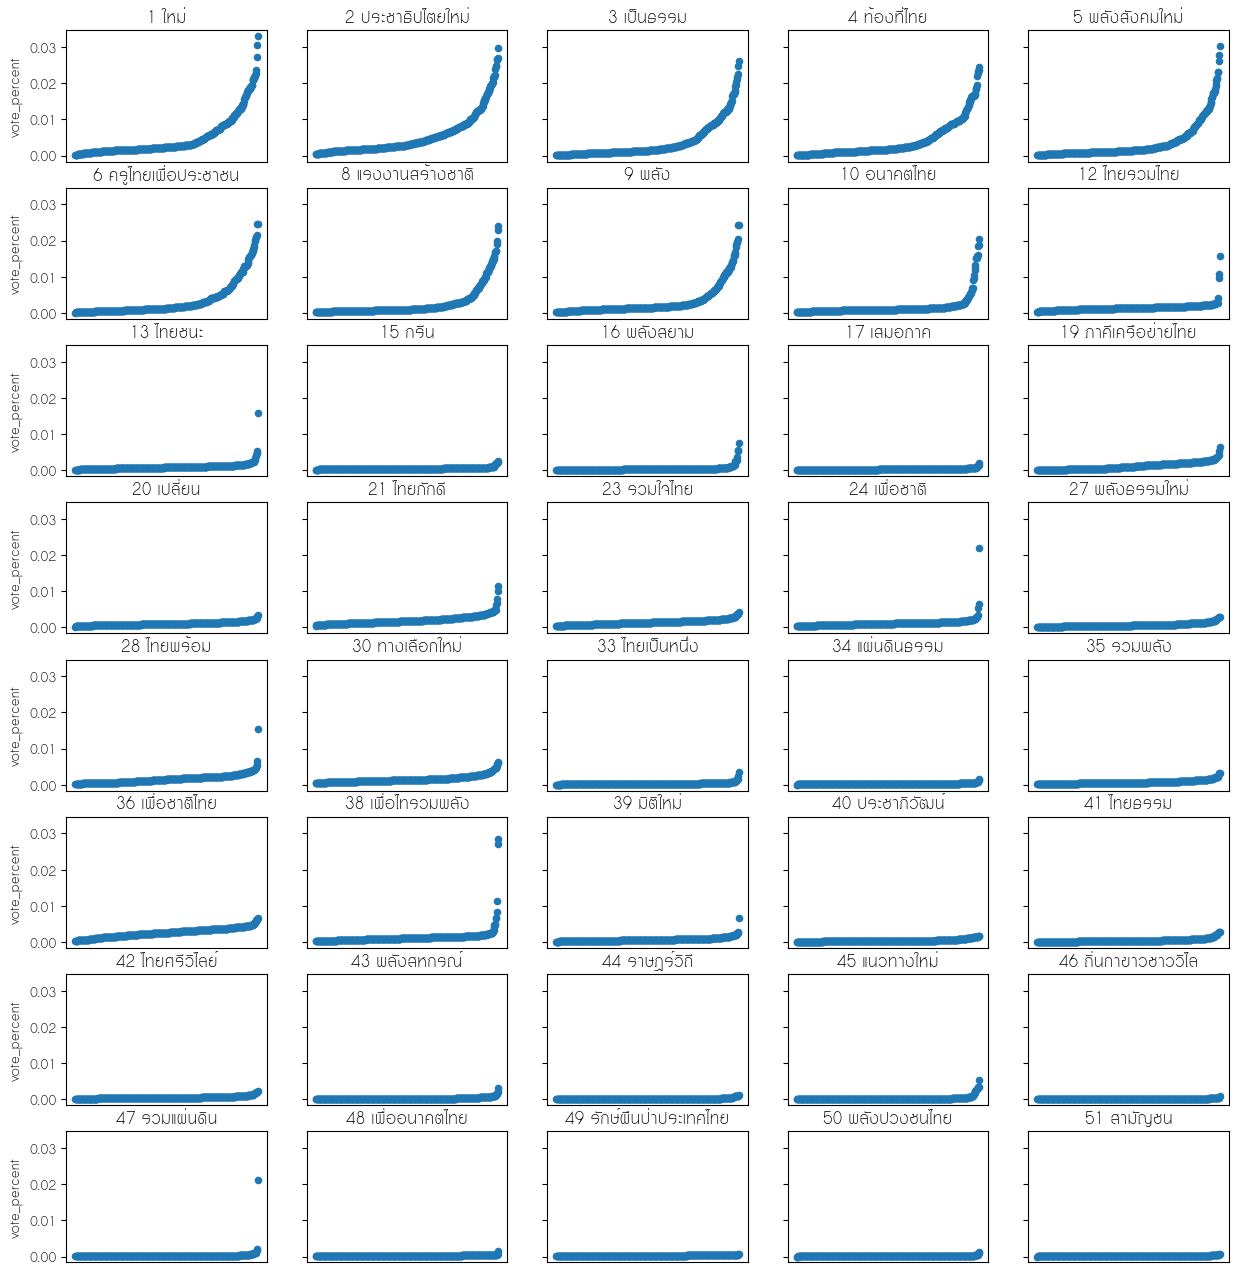

In [99]:
# Sorted vote_percent plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df.reset_index().sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='vote_percent', kind='scatter', title=f'{party.party_no} {party.name}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )


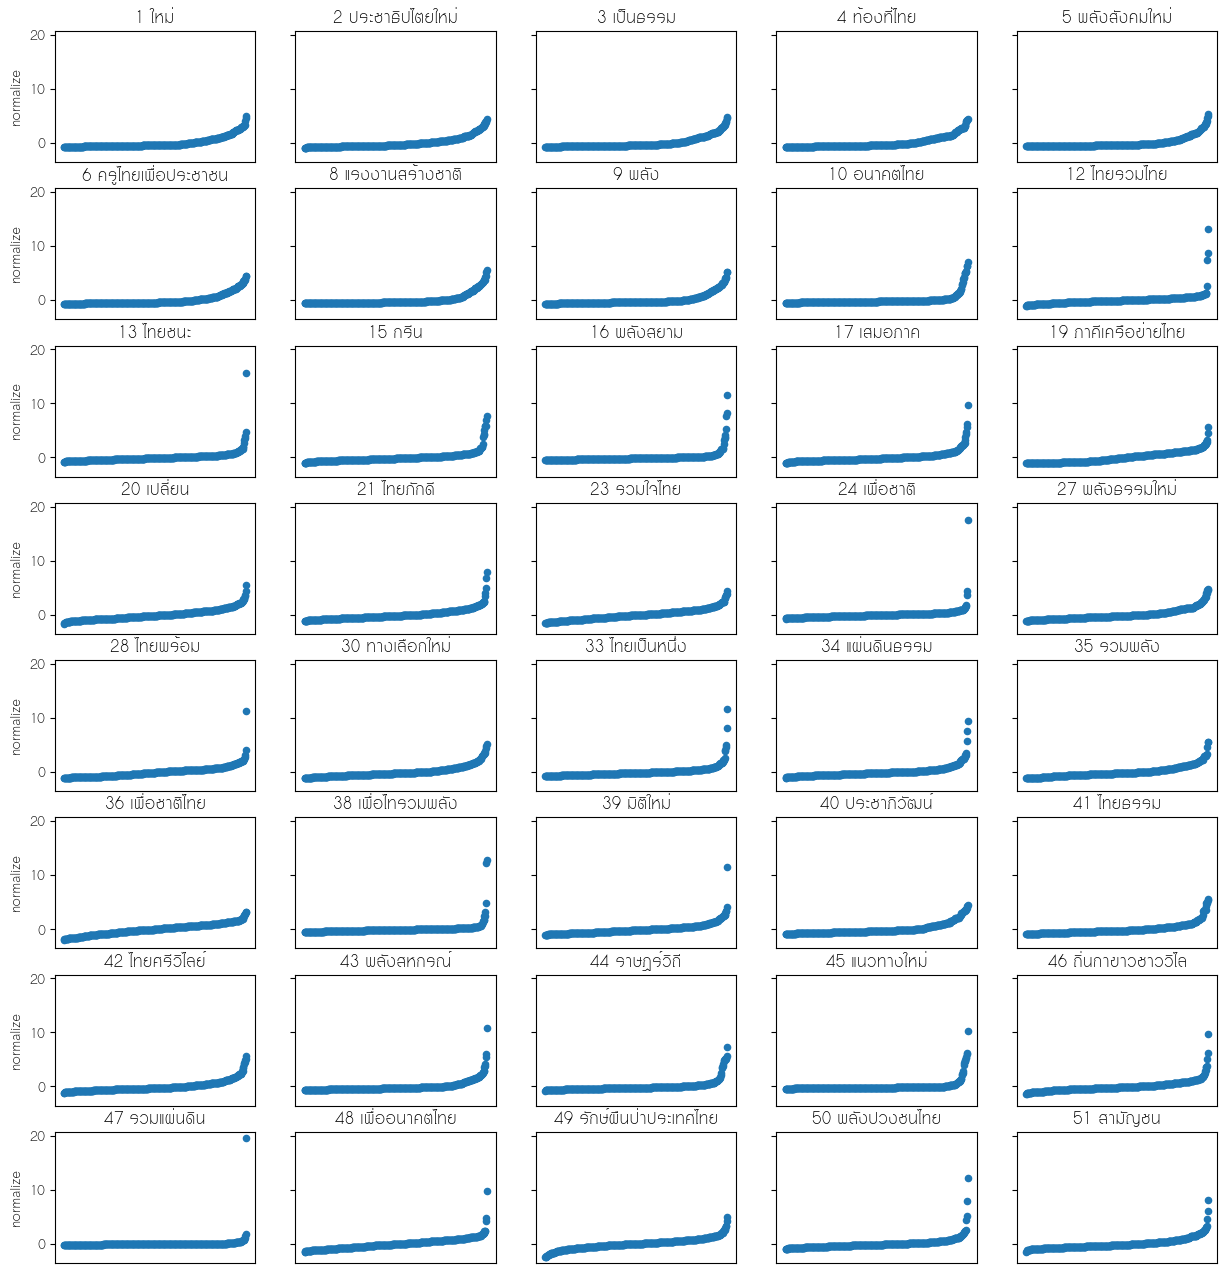

In [100]:
# Sorted normalized vote_percent plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df.sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='normalize', kind='scatter', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

/home/napat/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/napat/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


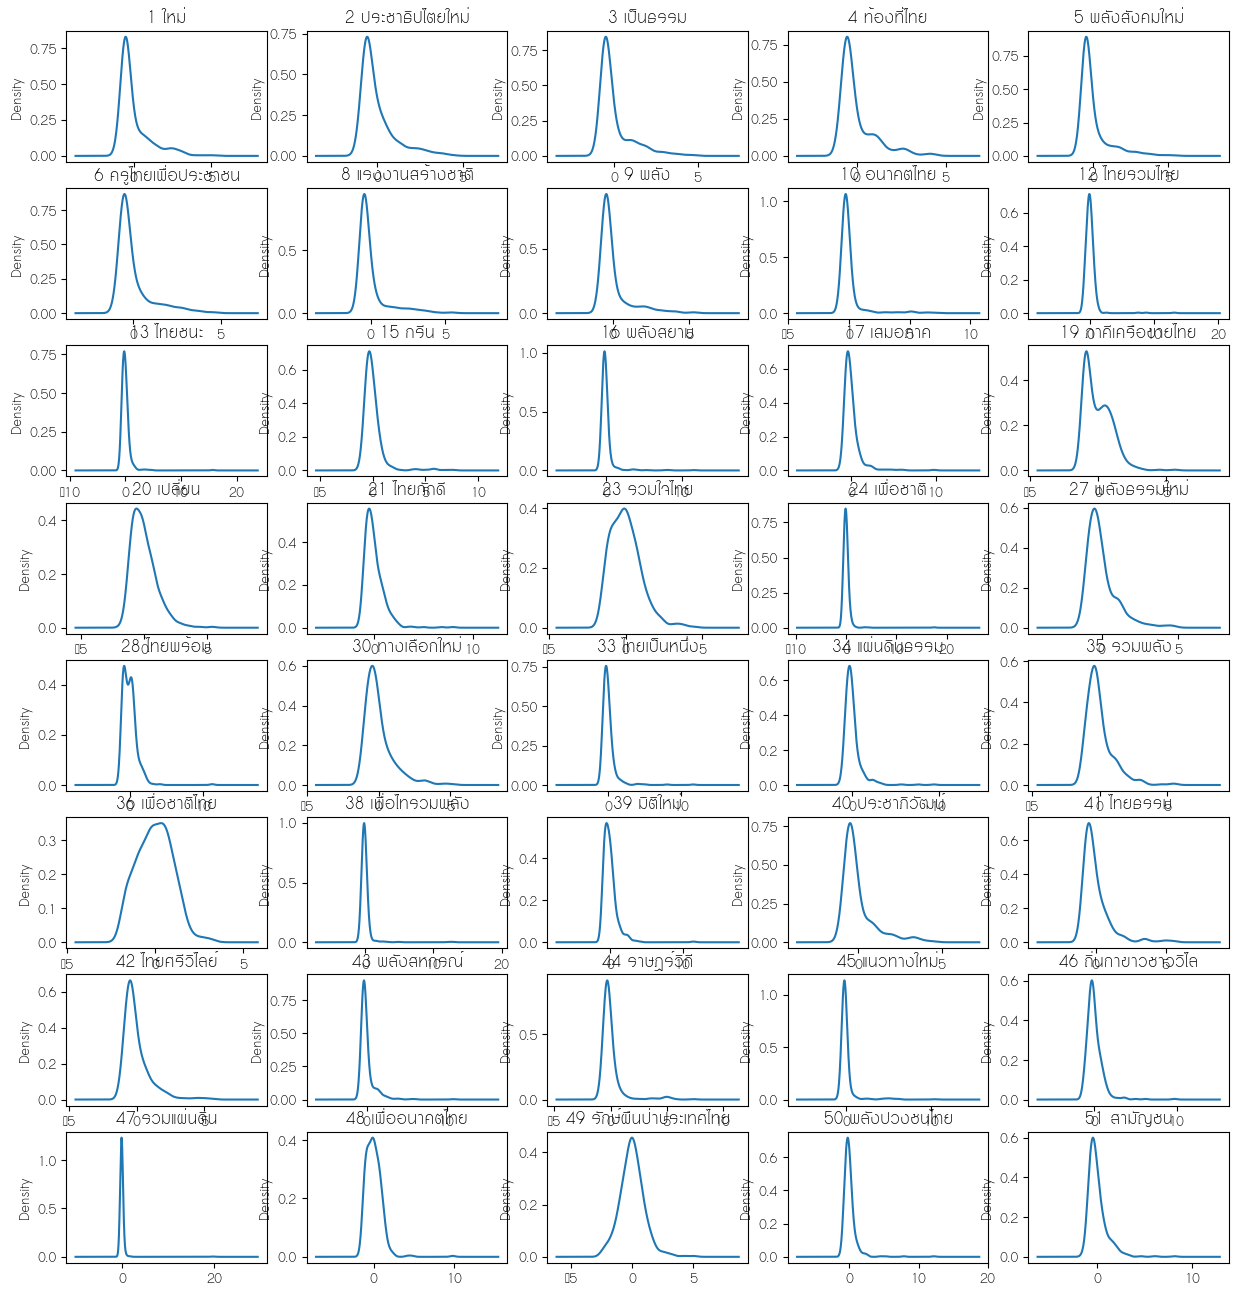

In [101]:
# normalize kde plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16))
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['normalize'].plot(kind='kde', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5], 
        # xticks=[], xlabel=''
    )

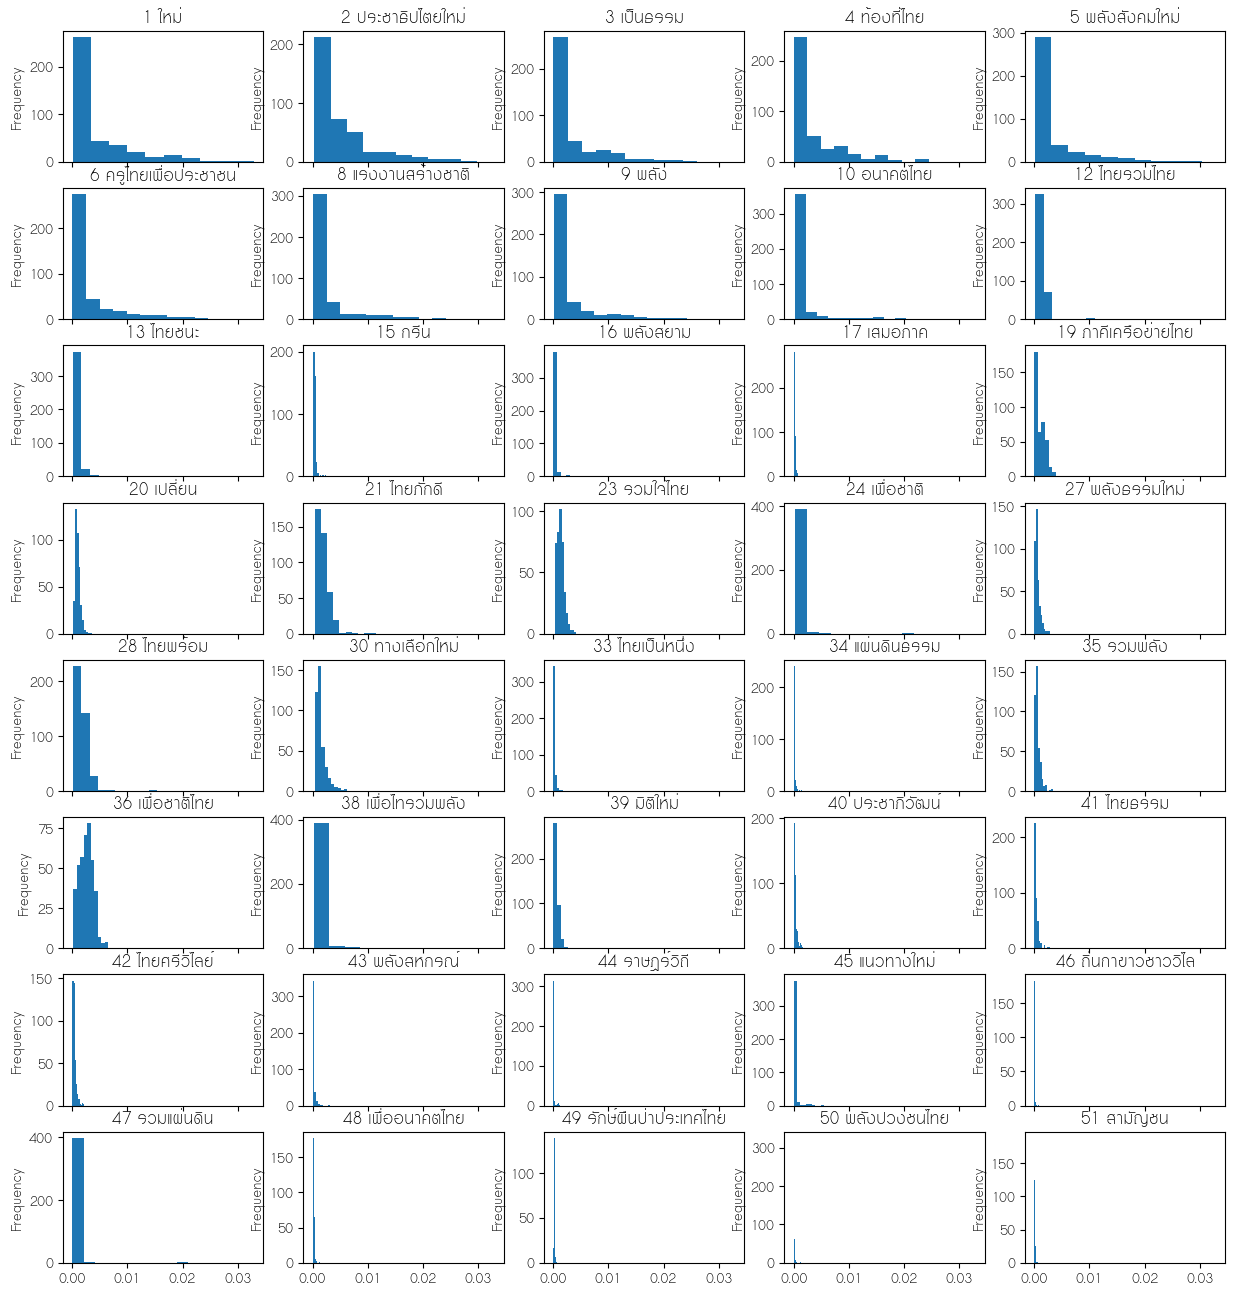

In [102]:
# vote_percent hist plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharex=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['vote_percent'].plot(kind='hist', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5]
    )

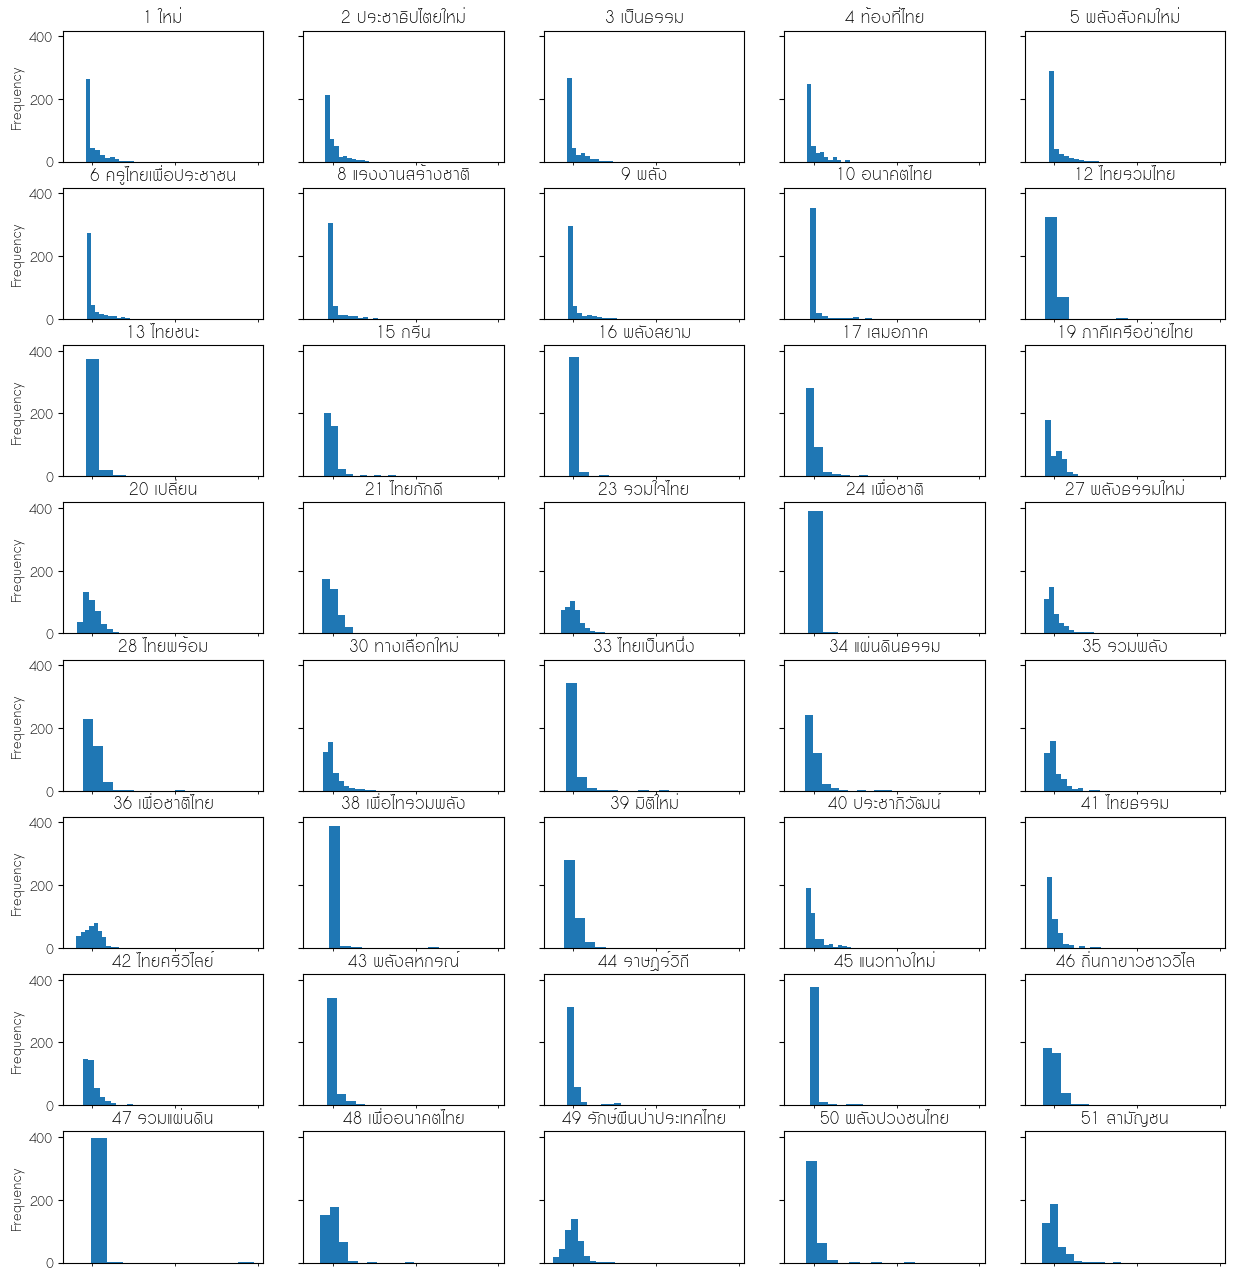

In [103]:
# normalize hist plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharex=True, sharey=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['normalize'].plot(kind='hist', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

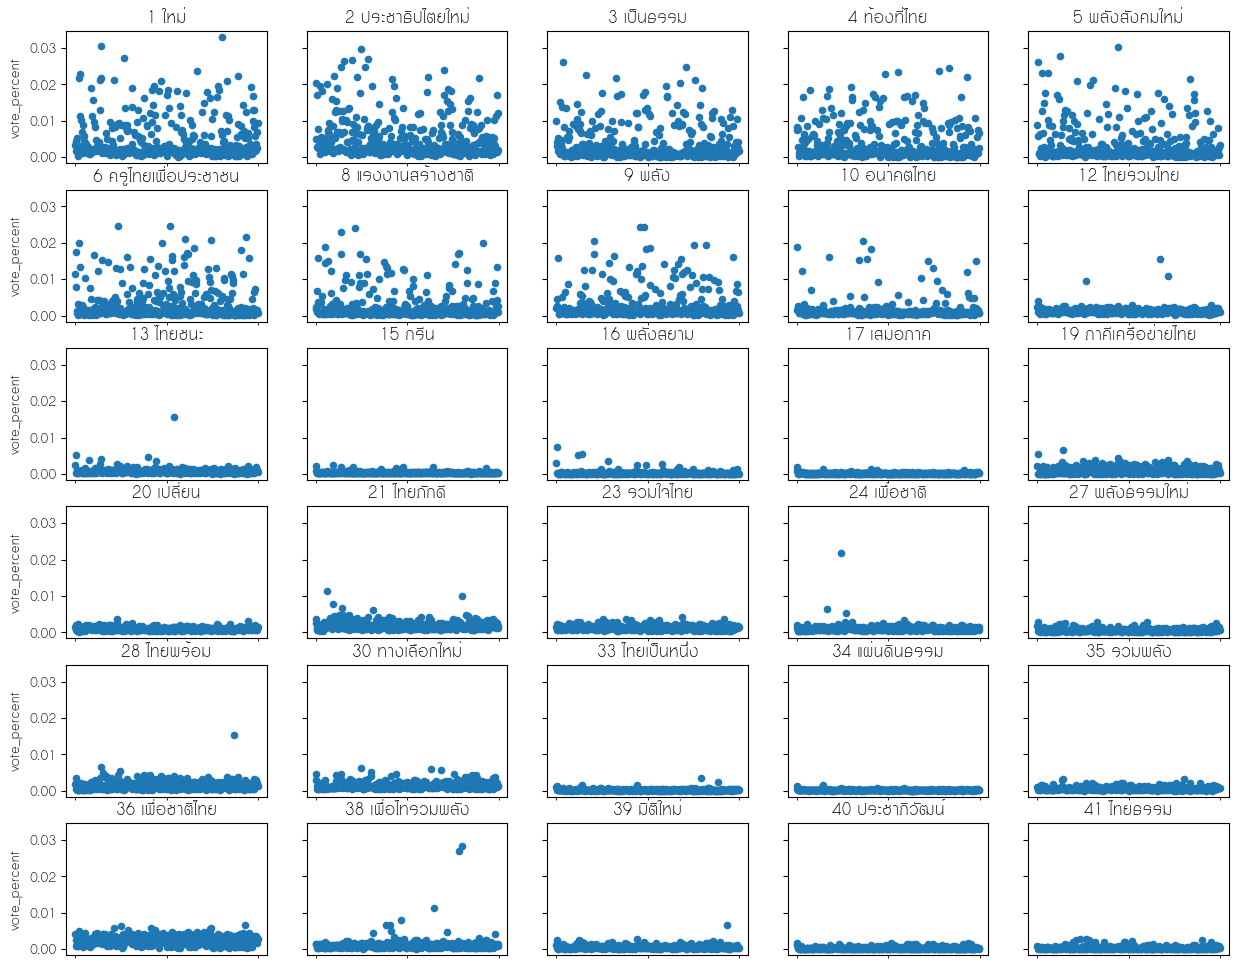

In [104]:
parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 12), sharex=True, sharey=True)
for i, party in enumerate(parties[:30]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df.plot(
        x='cons_id', y='vote_percent', kind='scatter', title=f'{party.party_no} {party.name}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

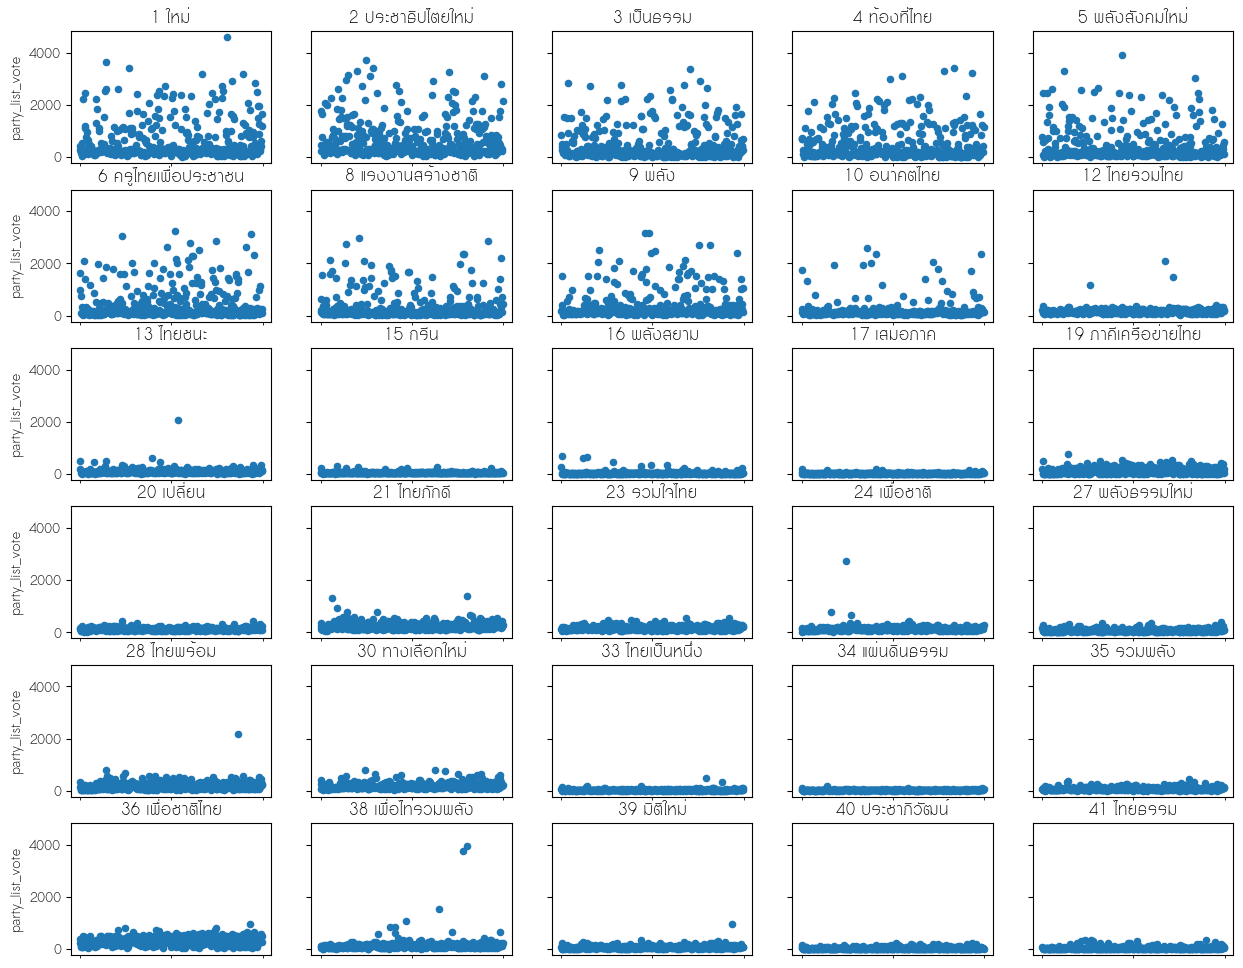

In [105]:
parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 12), sharex=True, sharey=True)
for i, party in enumerate(parties[:30]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df.plot(
        x='cons_id', y='party_list_vote', kind='scatter', title=f'{party.party_no} {party.name}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

In [106]:
parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
for party in parties[:10]:
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    

In [150]:
suspected_constituencies = defaultdict(lambda: {
    'count': 0,
    'parties': {}
})
threshold = 1.5

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
for party in parties[:9]:
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['sdx'] = df['normalize'] >= threshold
    perc_75 = df['vote_percent'].describe()['75%']
    mean = df[df['vote_percent'] <= perc_75]['vote_percent'].mean()
    for cons_id in set(df[df['sdx']]['cons_id']):
        suspected_constituencies[cons_id]['count'] += 1
        suspected_constituencies[cons_id]['parties'][party] = {
            'mean': mean,
            'sd': df['vote_percent'].std(),
            'vote': df[df['cons_id'] == cons_id]['vote_percent'].values[0]
        }
    print('{} {} {}'.format(party, mean, df['vote_percent'].std()))
    
ordered_suspected_constituencies = sorted(
    [(con, d['count']) for con, d in suspected_constituencies.items()], 
    key=lambda x: x[0]
)
print(len(ordered_suspected_constituencies))

[1] ใหม่ 0.0020838919983317663 0.005584284817969388
[2] ประชาธิปไตยใหม่ 0.002681487179393162 0.005528392766996341
[3] เป็นธรรม 0.001273166168104354 0.0047430682179403745
[4] ท้องที่ไทย 0.0015526371279450182 0.004744068224574547
[5] พลังสังคมใหม่ 0.0011984616296848074 0.0049800045394402526
[6] ครูไทยเพื่อประชาชน 0.0011464791267341338 0.004715263199530886
[8] แรงงานสร้างชาติ 0.0008373715845832913 0.003932198326587808
[9] พลัง 0.0012063836733956727 0.004057603167837081
[10] อนาคตไทย 0.0007499024110277746 0.002693614393728673
235


In [151]:
for p, d in suspected_constituencies['CMI_6']['parties'].items():
    print(p, d)

[10] อนาคตไทย {'mean': 0.0007499024110277746, 'sd': 0.002693614393728673, 'vote': 0.0151796973518285}


In [152]:
cons_dict = {c.cons_id: c for c in Constituency.objects.all()}
cheating_parties = defaultdict(lambda: 0)
with open('/tmp/out.txt', 'w') as f:
    for cons_id, _ in ordered_suspected_constituencies:
        results = ResultConstituenciesCandidateConst.objects.filter(
            cons_id=cons_id
        ).select_related('cons', 'mp_app', 'party').order_by('mp_app_rank')
        f.write('{} {} {}\n'.format(cons_id, results[0].cons.prov.province, results[0].cons.zone))
        party_1_10 = set()
        for p, d in suspected_constituencies[cons_id]['parties'].items():
            party_1_10.add(p.party_no)
            f.write('{} {} {}/{}\n'.format(
                p.party_no, p.name,
                round(cons_dict[cons_id].registered_vote * (d['vote']-d['mean'])),
                round(cons_dict[cons_id].registered_vote * d['vote']), 
            ))
        f.write('---\n')
        if results[0].mp_app.mp_app_no in party_1_10:
            cheating_parties[results[0].party] += 1
        for r in results[:4]:
            f.write('{} {} {} {}\n'.format(
                r.mp_app.mp_app_no, r.party.name, r.mp_app.mp_app_name, r.mp_app_vote
            ))
        f.write('======\n\n')

In [153]:
cheating_df = pd.DataFrame([{'party': cp, 'count': count} for (cp, count) in cheating_parties.items()])
cheating_df.sort_values('count', ascending=False)

,party,count
0,[7] ภูมิใจไทย,59
2,[29] เพื่อไทย,58
3,[37] พลังประชารัฐ,31
4,[26] ประชาธิปัตย์,13
1,[22] รวมไทยสร้างชาติ,11
5,[18] ชาติไทยพัฒนา,8
7,[11] ประชาชาติ,4
9,[32] ไทยสร้างไทย,4
8,[38] เพื่อไทรวมพลัง,2
6,[14] ชาติพัฒนากล้า,1


<Axes: xlabel='party'>

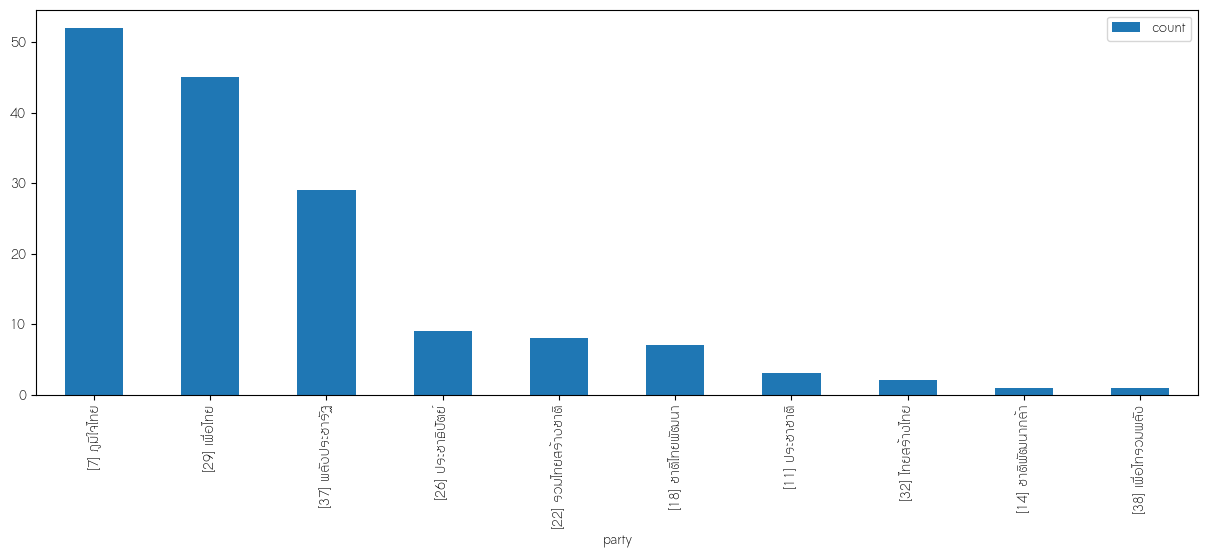

In [122]:
cheating_df.sort_values('count', ascending=False).plot(x='party', figsize=(15, 5), kind='bar')

# All vote count

In [111]:
from django.db.models import Sum

constituencies_point = pd.DataFrame(ResultConstituenciesCandidateConst.objects.all().values(
    'party'
).annotate(cons_total=Sum('mp_app_vote'))).set_index('party')
party_list_point = pd.DataFrame(ResultConstituenciesPartyListConst.objects.all().values(
    'party'
).annotate(list_total=Sum('party_list_vote'))).set_index('party')

party_points = constituencies_point.join(party_list_point, on='party', how='outer')
party_df = pd.DataFrame(Party.objects.filter(
    id__in=party_points.index.to_list()
).values('id', 'party_no', 'name')).set_index('id')
party_points = party_df.join(party_points)
party_result = pd.DataFrame(ResultSummary.objects.all().order_by('id').values(
    'party_id', 'constituencies_count', 'party_list_count'
)).set_index('party_id')
mp_summary = party_points.join(party_result, how='right')
mp_summary['total_mp'] = mp_summary['constituencies_count'] + mp_summary['party_list_count']
mp_summary['total_vote'] = mp_summary['cons_total'] + mp_summary['list_total']
mp_summary['vote_per_mp'] = mp_summary['total_vote'] / mp_summary['total_mp']
mp_summary[['name', 'vote_per_mp']].sort_values('vote_per_mp', ascending=False)

,name,vote_per_mp
party_id,,
719,เสรีรวมไทย,630763.000000
712,ประชาธิปไตยใหม่,287916.000000
706,ชาติพัฒนากล้า,255311.000000
778,ใหม่,251096.000000
763,รวมไทยสร้างชาติ,233071.611111
762,ไทยสร้างไทย,217265.166667
776,ท้องที่ไทย,202613.000000
747,เป็นธรรม,199678.000000
761,พลังสังคมใหม่,197732.000000


# Count winners only

In [112]:
from django.db.models import Sum

constituencies_point = pd.DataFrame(ResultConstituenciesCandidateConst.objects.filter(
    mp_app_rank=1
).values(
    'party'
).annotate(cons_total=Sum('mp_app_vote'))).set_index('party')
party_list_point = pd.DataFrame(ResultConstituenciesPartyListConst.objects.all().values(
    'party'
).annotate(list_total=Sum('party_list_vote'))).set_index('party')

party_points = constituencies_point.join(party_list_point, how='outer').fillna(0)

party_df = pd.DataFrame(Party.objects.filter(
    id__in=party_points.index.to_list()
).values('id', 'party_no', 'name')).set_index('id')
party_points = party_df.join(party_points)
party_result = pd.DataFrame(ResultSummary.objects.all().order_by('id').values(
    'party_id', 'constituencies_count', 'party_list_count'
)).set_index('party_id')
mp_summary = party_points.join(party_result, how='right')
mp_summary['total_mp'] = mp_summary['constituencies_count'] + mp_summary['party_list_count']
mp_summary['total_vote'] = mp_summary['cons_total'] + mp_summary['list_total']
mp_summary['vote_per_list'] = mp_summary['total_vote'] / mp_summary['party_list_count']
mp_summary['vote_per_mp'] = mp_summary['total_vote'] / mp_summary['total_mp']
mp_summary[['name', 'vote_per_list', 'vote_per_mp']].sort_values('vote_per_mp', ascending=False)

,name,vote_per_list,vote_per_mp
party_id,,,
719,เสรีรวมไทย,3.513760e+05,351376.000000
712,ประชาธิปไตยใหม่,2.734300e+05,273430.000000
778,ใหม่,2.497310e+05,249731.000000
776,ท้องที่ไทย,2.014110e+05,201411.000000
747,เป็นธรรม,1.848150e+05,184815.000000
761,พลังสังคมใหม่,1.773790e+05,177379.000000
714,ครูไทยเพื่อประชาชน,1.751820e+05,175182.000000
763,รวมไทยสร้างชาติ,4.294690e+05,155086.027778
726,ก้าวไกล,4.846333e+05,125170.198675


In [113]:
mp_summary.sort_values('vote_per_mp')


,party_no,name,cons_total,list_total,constituencies_count,party_list_count,total_mp,total_vote,vote_per_list,vote_per_mp
party_id,,,,,,,,,,
743,37,พลังประชารัฐ,1416758.0,537625,39,1,40,1954383.0,1.954383e+06,48859.575000
709,7,ภูมิใจไทย,2725686.0,1138202,68,3,71,3863888.0,1.287963e+06,54420.957746
707,18,ชาติไทยพัฒนา,387565.0,192497,9,1,10,580062.0,5.800620e+05,58006.200000
701,26,ประชาธิปัตย์,773141.0,925349,22,3,25,1698490.0,5.661633e+05,67939.600000
773,38,เพื่อไทรวมพลัง,94345.0,67692,2,0,2,162037.0,inf,81018.500000
762,32,ไทยสร้างไทย,244064.0,340178,5,1,6,584242.0,5.842420e+05,97373.666667
740,11,ประชาชาติ,321351.0,602645,7,2,9,923996.0,4.619980e+05,102666.222222
705,29,เพื่อไทย,4480327.0,10962522,112,29,141,15442849.0,5.325120e+05,109523.751773
706,14,ชาติพัฒนากล้า,24089.0,212676,1,1,2,236765.0,2.367650e+05,118382.500000


In [114]:
mp_summary.sort_values('vote_per_list')

,party_no,name,cons_total,list_total,constituencies_count,party_list_count,total_mp,total_vote,vote_per_list,vote_per_mp
party_id,,,,,,,,,,
714,6,ครูไทยเพื่อประชาชน,0.0,175182,0,1,1,175182.0,1.751820e+05,175182.000000
761,5,พลังสังคมใหม่,0.0,177379,0,1,1,177379.0,1.773790e+05,177379.000000
747,3,เป็นธรรม,0.0,184815,0,1,1,184815.0,1.848150e+05,184815.000000
776,4,ท้องที่ไทย,0.0,201411,0,1,1,201411.0,2.014110e+05,201411.000000
706,14,ชาติพัฒนากล้า,24089.0,212676,1,1,2,236765.0,2.367650e+05,118382.500000
778,1,ใหม่,0.0,249731,0,1,1,249731.0,2.497310e+05,249731.000000
712,2,ประชาธิปไตยใหม่,0.0,273430,0,1,1,273430.0,2.734300e+05,273430.000000
719,25,เสรีรวมไทย,0.0,351376,0,1,1,351376.0,3.513760e+05,351376.000000
763,22,รวมไทยสร้างชาติ,816689.0,4766408,23,13,36,5583097.0,4.294690e+05,155086.027778


<Axes: >

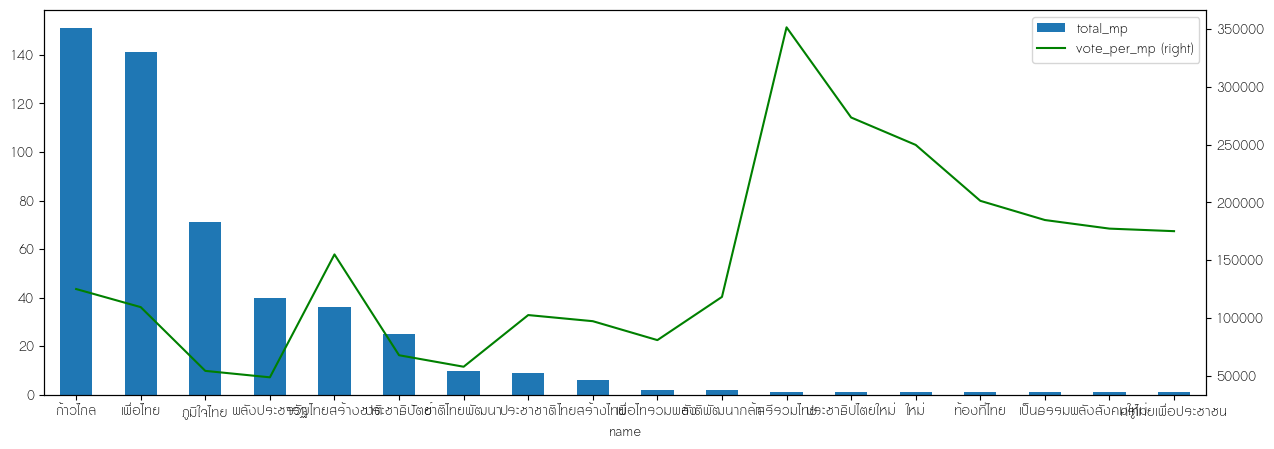

In [143]:
ax = mp_summary.plot(x='name', y='total_mp', kind='bar', figsize=(15, 5))
mp_summary.plot(x='name', y='vote_per_mp', secondary_y=True, kind='line', ax=ax, style='g')


# brother hood

In [164]:
all_cons = CandidateConstituency.objects.all().values('mp_app_id', 'mp_app_name')
all_party_list = CandidatePartyList.objects.all().values('id', 'name')

last_names = defaultdict(list)
for con in all_cons:
    last_name = con['mp_app_name'].split(' ')[-1]
    last_names[last_name].append(con['mp_app_id'])

for pl in all_party_list:
    last_name = pl['name'].split(' ')[-1]
    last_names[last_name].append(pl['id'])

dup_last_name = {k: v for (k, v) in last_names.items() if len(v) >= 2}
dup_last_name

{'บัวแก้ว': ['ACR_1_1', 'PLK_2_2', 'STI_2_9'],
 'บุญเสริฐ': ['ACR_1_9', 'NMA_9_5'],
 'อมรสิน': ['ACR_2_2', 1000],
 'เงินหมื่น': ['ACR_2_5', 829],
 'ประเสริฐศรี': ['ACR_2_9', 'UBN_3_7', 1382],
 'ศรีราชา': ['ATG_1_7', 'ATG_2_4'],
 'ปริศนานันทกุล': ['ATG_1_8', 'ATG_2_8'],
 'ดาวเรือง': ['AYA_1_1', 'RET_8_3', 'SSK_9_2'],
 'เสมอภาพ': ['BKK_1_14', 'YLA_1_2'],
 'และมิตร': ['BKK_10_15', 'BKK_11_13'],
 'เวสารัชตระกูล': ['BKK_10_3', 'BKK_11_9'],
 'หงสกุล': ['BKK_11_1', 'NMA_7_10'],
 'ห่วงทรัพย์': ['BKK_12_10', 'BKK_16_11'],
 'พูนสวัสดิ์': ['BKK_13_4', 'BRM_2_3'],
 'เพ็งสุข': ['BKK_13_7', 'NSN_2_9'],
 'พิณทอง': ['BKK_14_3', 'BKK_17_4', 'BKK_21_6'],
 'กอเซ็มมูซอ': ['BKK_15_14', 'BKK_22_13'],
 'วงษ์มะเซาะ': ['BKK_15_5', 'BKK_19_14'],
 'รัสมี': ['BKK_17_10', 'BKK_18_4'],
 'อิสระเสรีพงษ์': ['BKK_17_13', 'BKK_18_15'],
 'รักชลธี': ['BKK_17_6', 'BKK_18_11', 'BKK_19_12'],
 'คำประกอบ': ['BKK_18_1', 'NSN_2_10'],
 'ฤกษ์ดี': ['BKK_18_9', 'BKK_20_11', 'SNI_5_8'],
 'มีนชัยนันท์': ['BKK_19_9', 'BKK_9_10'],
 'ชุณ

In [170]:
with open('/tmp/out2.txt', 'w') as f:
    for last_name in dup_last_name:
        cons = [i for i in dup_last_name[last_name] if isinstance(i, str)] 
        pls = [i for i in dup_last_name[last_name] if isinstance(i, int)]
        m_cons = CandidateConstituency.objects.filter(mp_app_id__in=cons).select_related('mp_app_party')
        m_pls = CandidatePartyList.objects.filter(id__in=pls).select_related('party')
        parties = set()
        for con in m_cons:
            parties.add(con.mp_app_party)
        for pl in m_pls:
            parties.add(pl.party)
        if len(parties) <= 1:
            print(f'skip {last_name} {parties.pop()}')
            continue
        f.write(f'{last_name}\n')
        for con in m_cons:
            f.write(f'{con.mp_app_name} {con.mp_app_party} {con.mp_app_id}\n')
        for pl in m_pls:
            f.write(f'{pl.name} {pl.party}\n')
        f.write('---\n')
        

skip เงินหมื่น [26] ประชาธิปัตย์
skip ศรีราชา [29] เพื่อไทย
skip ปริศนานันทกุล [7] ภูมิใจไทย
skip และมิตร [21] ไทยภักดี
skip ห่วงทรัพย์ [29] เพื่อไทย
skip พิณทอง [61] คลองไทย
skip กอเซ็มมูซอ [21] ไทยภักดี
skip รัสมี [37] พลังประชารัฐ
skip อิสระเสรีพงษ์ [29] เพื่อไทย
skip รักชลธี [45] แนวทางใหม่
skip กิจประพันธ์ [21] ไทยภักดี
skip ประจวบเหมาะ [32] ไทยสร้างไทย
skip ปัญญาสกุลวงศ์ [26] ประชาธิปัตย์
skip ศรีเปารยะ [21] ไทยภักดี
skip เตชะโสภณมณี [7] ภูมิใจไทย
skip เลิศนุวัฒน์ [22] รวมไทยสร้างชาติ
skip ม่วงศิริ [26] ประชาธิปัตย์
skip อยู่บำรุง [29] เพื่อไทย
skip พวงมาลัย [54] ภราดรภาพ
skip ชลายนนาวิน [53] พลังสังคม
skip เจริญพระสิริ [56] ประชาไทย
skip คงอุดม [22] รวมไทยสร้างชาติ
skip ทบทอบ [21] ไทยภักดี
skip ติยะบุตร [26] ประชาธิปัตย์
skip ลิ้มโฆษิต [26] ประชาธิปัตย์
skip ชิดชอบ [7] ภูมิใจไทย
skip ซารัมย์ [7] ภูมิใจไทย
skip วงศ์ทรายทอง [37] พลังประชารัฐ
skip วงษ์วรรณ [21] ไทยภักดี
skip ฉายแสง [29] เพื่อไทย
skip อัศวชัยโสภณ [29] เพื่อไทย
skip ตันเจริญ [29] เพื่อไทย
skip ประมวญพิสุทธิ์ [47] รวม

In [175]:
#winner only
winner_parties = ResultSummary.objects.all().values_list('party_id', flat=True)
with open('/tmp/out3.txt', 'w') as f:
    for last_name in dup_last_name:
        cons = [i for i in dup_last_name[last_name] if isinstance(i, str)] 
        pls = [i for i in dup_last_name[last_name] if isinstance(i, int)]
        m_cons = CandidateConstituency.objects.filter(mp_app_id__in=cons).select_related('mp_app_party')
        m_pls = CandidatePartyList.objects.filter(id__in=pls).select_related('party')
        parties = set()
        for con in m_cons:
            if con.mp_app_party_id in winner_parties:
                parties.add(con.mp_app_party)
        for pl in m_pls:
            if pl.party_id in winner_parties:
                parties.add(pl.party)
        if not parties:
            print(f'skip {last_name}')
            continue
        if len(parties) <= 1:
            print(f'skip {last_name} {parties.pop()}')
            continue
        f.write(f'{last_name}\n')
        for con in m_cons:
            f.write(f'{con.mp_app_name} {con.mp_app_party} {con.mp_app_id}\n')
        for pl in m_pls:
            f.write(f'{pl.name} {pl.party}\n')
        f.write('---\n')

skip อมรสิน [32] ไทยสร้างไทย
skip เงินหมื่น [26] ประชาธิปัตย์
skip ศรีราชา [29] เพื่อไทย
skip ปริศนานันทกุล [7] ภูมิใจไทย
skip เสมอภาพ
skip และมิตร
skip หงสกุล [29] เพื่อไทย
skip ห่วงทรัพย์ [29] เพื่อไทย
skip เพ็งสุข [31] ก้าวไกล
skip พิณทอง
skip กอเซ็มมูซอ
skip วงษ์มะเซาะ [14] ชาติพัฒนากล้า
skip รัสมี [37] พลังประชารัฐ
skip อิสระเสรีพงษ์ [29] เพื่อไทย
skip รักชลธี
skip ชุณหะวัณ [31] ก้าวไกล
skip มะหะหมัด [22] รวมไทยสร้างชาติ
skip เลาหพงศ์ชนะ [29] เพื่อไทย
skip กิจประพันธ์
skip ประจวบเหมาะ [32] ไทยสร้างไทย
skip ปัญญาสกุลวงศ์ [26] ประชาธิปัตย์
skip ศรีเปารยะ
skip เตชะโสภณมณี [7] ภูมิใจไทย
skip เลิศนุวัฒน์ [22] รวมไทยสร้างชาติ
skip ปัตตะพงศ์ [25] เสรีรวมไทย
skip ประสพโชค
skip ม่วงศิริ [26] ประชาธิปัตย์
skip อยู่บำรุง [29] เพื่อไทย
skip พวงมาลัย
skip เลาหพล [31] ก้าวไกล
skip บุนนาค [32] ไทยสร้างไทย
skip บุญนาค [25] เสรีรวมไทย
skip ศิริมา [26] ประชาธิปัตย์
skip จรัสสุริยพงศ์ [3] เป็นธรรม
skip ชลายนนาวิน
skip บุญมี [37] พลังประชารัฐ
skip เจริญพระสิริ
skip ขวัญเมือง [26] ประชาธิปัตย์
skip ดว